# Data Description

This section covers brief summary of the data and its characterstics. 

In [ ]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# load the data
data = pd.read_csv("sample_data/in-vehicle-coupon-recommendation.csv") #read the data

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# # Checking if GPU is being used 
# ! pip uninstall tensorflow
# ! pip install tensorflow-gpu
# uncomment this if you run on local machine. 
# use this if you run on google collab
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
# use pandas stat summary function
# check whether target is balanced or skewed
# other summary techniques 

uniquevals={}
for column in data.columns:
    uniquevals[column]=list(data[column].unique())

uniquevals

{'Bar': ['never', 'less1', '1~3', 'gt8', nan, '4~8'],
 'CarryAway': [nan, '4~8', '1~3', 'gt8', 'less1', 'never'],
 'CoffeeHouse': ['never', 'less1', '4~8', '1~3', 'gt8', nan],
 'Restaurant20To50': ['1~3', 'less1', 'never', 'gt8', '4~8', nan],
 'RestaurantLessThan20': ['4~8', '1~3', 'less1', 'gt8', nan, 'never'],
 'Y': [1, 0],
 'age': ['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
 'car': [nan,
  'Scooter and motorcycle',
  'crossover',
  'Mazda5',
  'do not drive',
  'Car that is too old to install Onstar :D'],
 'coupon': ['Restaurant(<20)',
  'Coffee House',
  'Carry out & Take away',
  'Bar',
  'Restaurant(20-50)'],
 'destination': ['No Urgent Place', 'Home', 'Work'],
 'direction_opp': [1, 0],
 'direction_same': [0, 1],
 'education': ['Some college - no degree',
  'Bachelors degree',
  'Associates degree',
  'High School Graduate',
  'Graduate degree (Masters or Doctorate)',
  'Some High School'],
 'expiration': ['1d', '2h'],
 'gender': ['Female', 'Male'],
 'has_children'

# EDA

The data analysis is done in this section. First, we encoded values into readable format. Then we used couple of data visualization techniques to plot the data. 

In [ ]:
eda_data = data.copy() #creating a copy of the data


In [ ]:
eda_data.drop('car',axis=1,inplace=True) #dropping car column.
columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for column in columns:
  mode = eda_data[column].value_counts().index[0]
  eda_data[column].fillna(eda_data[column].mode()[0], inplace=True)#replacing with mode just for EDA analysis.
eda_data.rename(columns={'Y':'Coupon_Taken'},inplace=True) #renaming target column

In [ ]:
eda_data['maritalStatus'] = eda_data['maritalStatus'].replace(['Divorced','Widowed'],'Single')
eda_data['coupon'] = eda_data['coupon'].replace(['Restaurant(<20)','Restaurant(20-50)'],'Restaurant')
age_replace = {'below21':'18-25','21':'18-25','26':'26-35','31':'26-35','36':'36-45','41':'36-45','46':'46 and above','50plus':'46 and above'}
eda_data['age'].replace(age_replace,inplace=True)
education_replace = {'Some college - no degree':'No Degree','Bachelors degree':'BA','Associates degree':'Associate','High School Graduate':'High School','Graduate degree (Masters or Doctorate)':'Grad'
,'Some High School':'High School'}
eda_data['education'].replace(education_replace,inplace=True)
passanger_replace = {'Alone':'Alone', 'Friend(s)':'Friend', 'Kid(s)':'Family', 'Partner':'Family'}
eda_data['passanger'].replace(passanger_replace,inplace=True)
# cleaning attribute values 


In [ ]:
cols=['Bar','CarryAway','CoffeeHouse','Restaurant20To50','RestaurantLessThan20']
for column in cols: 
  eda_data[column] = eda_data[column].replace('less1','never') 
#replace less1 with never.(as less than 1 is 0, which can be interpreted as never.)

In [ ]:
# cleaning attribute values
bar_replace = {'1~3':'1 to 3','4~8':'4 to 8','gt8':'greater than 8'}
eda_data['Bar'].replace(bar_replace,inplace=True)
CarryAway_replace = {'1~3':'1 to 3','4~8':'4 to 8','gt8':'greater than 8'}
eda_data['CarryAway'].replace(CarryAway_replace,inplace=True)
CoffeeHouse_replace = {'1~3':'1 to 3','4~8':'4 to 8','gt8':'greater than 8'}
eda_data['CoffeeHouse'].replace(CoffeeHouse_replace,inplace=True)
Restaurant1_replace = {'1~3':'1 to 3','4~8':'4 to 8','gt8':'greater than 8'}
eda_data['Restaurant20To50'].replace(Restaurant1_replace,inplace=True)
Restaurant2_replace = {'1~3':'1 to 3','4~8':'4 to 8','gt8':'greater than 8'}
eda_data['RestaurantLessThan20'].replace(Restaurant2_replace,inplace=True)

In [ ]:
#creating new column with categories of existing attributes.
def func(eda_data):
  if eda_data['occupation']=='Unemployed':
    return 0
  if eda_data['occupation']=='Student':
    return 0
  if eda_data['occupation']=='Retired':
    return 0
  return 1

eda_data['employed']=eda_data.apply(lambda eda_data:func(eda_data),axis=1)

def func1(eda_data):
  if eda_data['income']=='Less than $12500':
    return 'Low income'
  if eda_data['income']=='$12500 - $24999':
    return 'Low income'
  if eda_data['income']=='$25000 - $37499':
    return 'Low income'
  if eda_data['income']=='$37500 - $49999':
    return 'middle income'
  if eda_data['income']=='$50000 - $62499':
    return 'middle income'
  if eda_data['income']=='$62500 - $74999':
    return 'middle income'
  if eda_data['income']=='$75000 - $87499':
    return 'high income'
  if eda_data['income']=='$87500 - $99999':
    return 'high income'
  if eda_data['income']=='$100000 or More':
    return 'high income'

eda_data['income category']=eda_data.apply(lambda eda_data:func1(eda_data),axis=1)

In [ ]:
#income categories changed
def func2(data):
  if data['income'] == 'Less than $12500':
    return '$0-$37499'
  if data['income'] == '$12500 - $24999':
    return '$0-$37499'
  if data['income'] == '$25000 - $37499':  
    return '$0-$37499'
  if data['income'] == '$37500 - $49999':
    return '$37500-$74999'
  if data['income'] == '$50000 - $62499':
    return '$37500-$74999'
  if data['income'] == '$62500 - $74999':
    return '$37500-$74999'
  if data['income'] == '$75000 - $87499':
    return '$74500 or More'
  if data['income'] == '$87500 - $99999':
    return '$74500 or More'
  if data['income'] == '$100000 or More':
    return '$74500 or More'

eda_data['income'] = eda_data.apply(lambda eda_data:func2(eda_data),axis = 1)

In [ ]:
#creating new column to categorise time values.
def func3(data):
  if data['time'] == '2PM':
    return 'afternoon'
  if data['time'] == '10AM':
    return 'morning'
  if data['time'] == '6PM':
    return 'night'
  if data['time'] == '7AM':
    return 'morning'
  if data['time'] == '10PM':
    return 'night'

eda_data['timing'] = eda_data.apply(lambda eda_data:func3(eda_data),axis = 1)

In [ ]:
RestaurantLessThan20_map = {'never':0,'1 to 3':1,'4 to 8':2,'greater than 8':3}
Restaurant20To50_map = {'never':0,'1 to 3':1,'4 to 8':2,'greater than 8':3}

# data.head()

eda_data['RestaurantLessThan20'].replace(RestaurantLessThan20_map,inplace=True)
eda_data['Restaurant20To50'].replace(Restaurant20To50_map,inplace=True)

conditions = [(eda_data['RestaurantLessThan20']>=eda_data['Restaurant20To50']),(eda_data['RestaurantLessThan20']<eda_data['Restaurant20To50'])]
choices = [eda_data['RestaurantLessThan20'],eda_data['Restaurant20To50']]

eda_data['Restaurant'] = np.select(conditions,choices)

rev_map_restaurant = {0:'never',1:'1 to 3',2:'4 to 8',3:'greater than 8'}
eda_data['Restaurant'].replace(rev_map_restaurant,inplace=True)

,temperature,has_children,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Taken,employed
temperature,1.000000,-0.019716,0.032174,-0.011667,-0.155332,-0.216254,0.097085,-0.097085,0.061240,-0.003478
has_children,-0.019716,1.000000,-0.030129,-0.007012,0.078211,-0.013722,-0.031620,0.031620,-0.045557,0.121831
RestaurantLessThan20,0.032174,-0.030129,1.000000,0.393382,-0.009987,-0.009956,-0.010669,0.010669,0.042747,0.049908
Restaurant20To50,-0.011667,-0.007012,0.393382,1.000000,-0.008563,-0.009682,-0.000643,0.000643,0.066015,0.033273
toCoupon_GEQ15min,-0.155332,0.078211,-0.009987,-0.008563,1.000000,0.324984,-0.303533,0.303533,-0.081602,0.014186
toCoupon_GEQ25min,-0.216254,-0.013722,-0.009956,-0.009682,0.324984,1.000000,-0.192319,0.192319,-0.103633,-0.011337
direction_same,0.097085,-0.031620,-0.010669,-0.000643,-0.303533,-0.192319,1.000000,-1.000000,0.014570,-0.031477
direction_opp,-0.097085,0.031620,0.010669,0.000643,0.303533,0.192319,-1.000000,1.000000,-0.014570,0.031477
Coupon_Taken,0.061240,-0.045557,0.042747,0.066015,-0.081602,-0.103633,0.014570,-0.014570,1.000000,0.008849
employed,-0.003478,0.121831,0.049908,0.033273,0.014186,-0.011337,-0.031477,0.031477,0.008849,1.000000


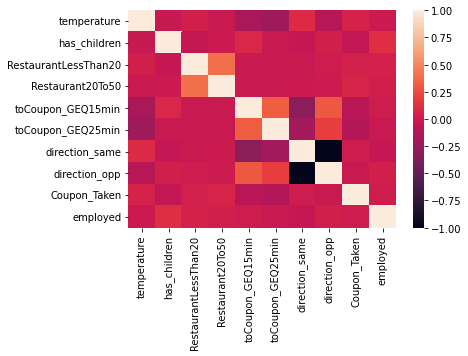

In [ ]:
eda_data.drop('toCoupon_GEQ5min',axis=1,inplace=True) #removing this column as it has only one unique value.
sns.heatmap(eda_data.corr())
eda_data.corr()

In [ ]:
positive_data = eda_data[eda_data['Coupon_Taken']==1] #data of people who have accepted coupon.
negative_data = eda_data[eda_data['Coupon_Taken']==0] #data of people who have not accepted coupon

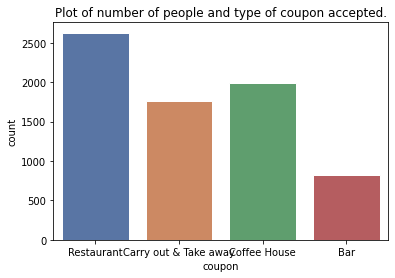

In [ ]:
plt.title('Plot of number of people and type of coupon accepted.')
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x=positive_data['coupon'])
plt.show()

**Restaurant coupons are most widely accepted.**

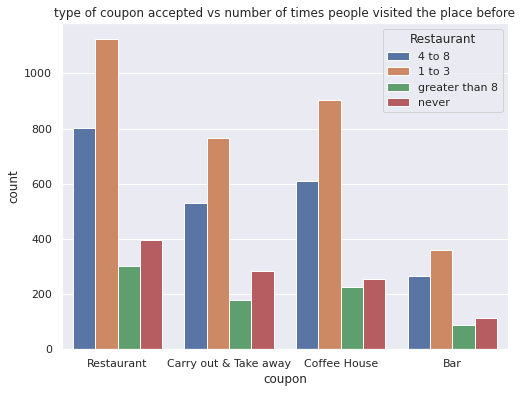

In [ ]:
sns.countplot(x=positive_data['coupon'], hue = positive_data['Restaurant'])
plt.title("type of coupon accepted vs number of times people visited the place before")
plt.show()

**Most people visited the places 1 to 3 times a month.**

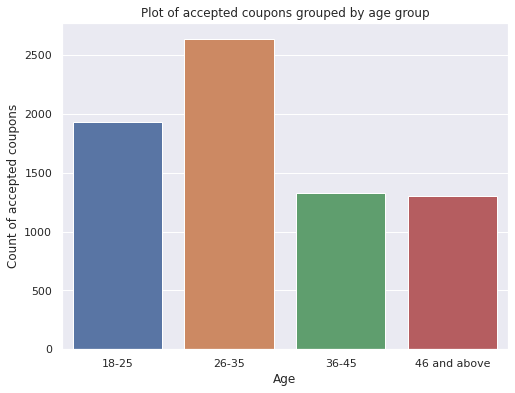

In [ ]:
age_order = ['18-25','26-35','36-45','46 and above']
sns.countplot(x=positive_data['age'],order = age_order) #Plot of age group of people who accepted the coupon
plt.title("Plot of accepted coupons grouped by age group")
plt.xlabel("Age")
plt.ylabel("Count of accepted coupons")
plt.show()

**More coupons are accepted by people of age group "26-35"**

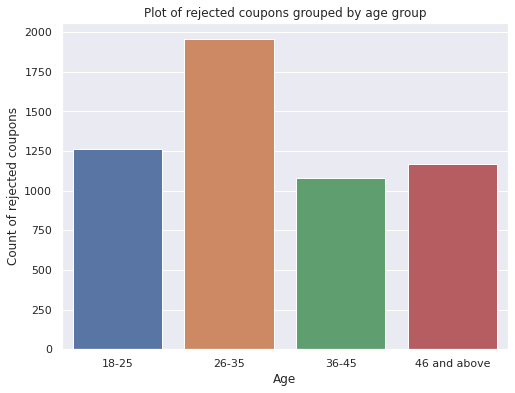

In [ ]:
sns.countplot(x=negative_data['age'],order = age_order)
plt.title("Plot of rejected coupons grouped by age group")
plt.xlabel("Age")
plt.ylabel("Count of rejected coupons")
plt.show()

**More coupons rejected by people of age group 26-35**

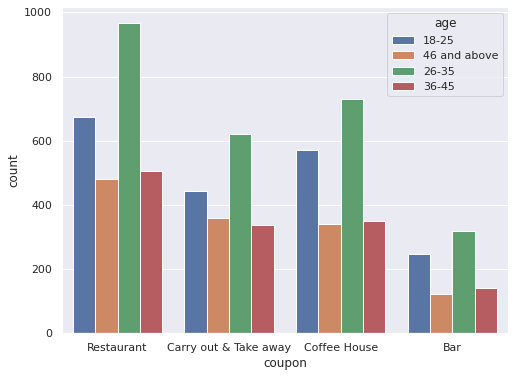

In [ ]:
sns.countplot(x=positive_data['coupon'],hue=positive_data['age'])

**people of 26-35 age group accepted most coupons.** 

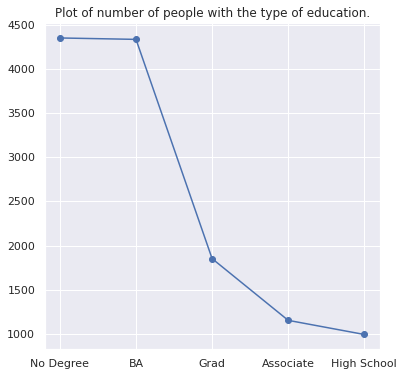

In [ ]:
plt.figure(figsize=(6,6))
x=list(eda_data['education'].value_counts().to_dict().keys())
y=list(eda_data['education'].value_counts().to_dict().values())
plt.title('Plot of number of people with the type of education.')
plt.plot(x,y,marker='o',linestyle = '-')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


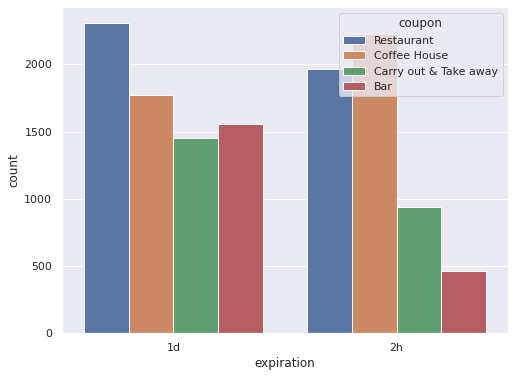

In [ ]:
sns.countplot(eda_data['expiration'],hue=eda_data['coupon'])

**Most coupons expire in 1 day**

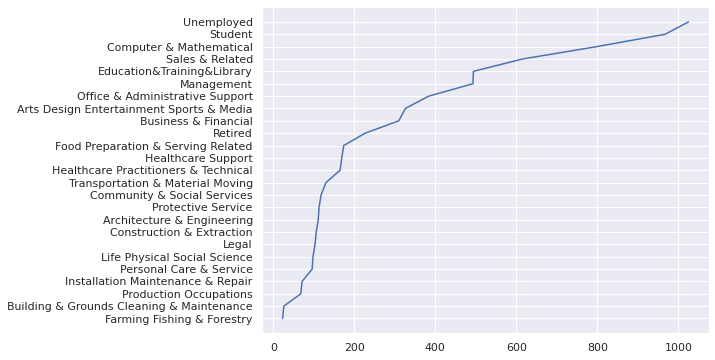

In [ ]:
sns.lineplot(y=positive_data['occupation'].value_counts().to_dict().keys(),x=positive_data['occupation'].value_counts().to_dict().values())

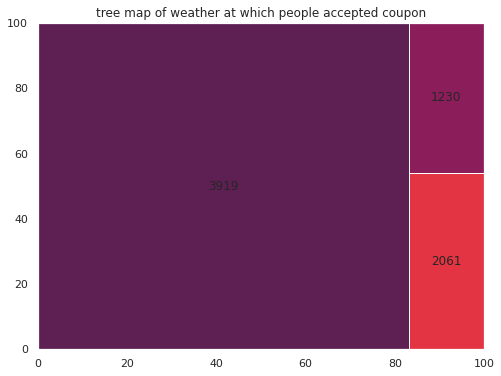

In [ ]:
!pip install squarify
import squarify
plt.title('tree map of weather at which people accepted coupon')
#Treemap->similar to pie chart
squarify.plot(sizes=positive_data['weather'].value_counts().tolist(),label=list(positive_data['temperature'].value_counts()))

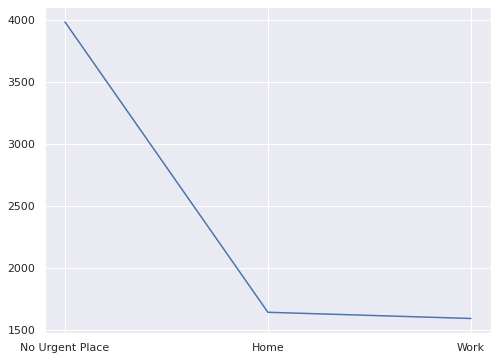

In [ ]:
sns.lineplot(x=positive_data['destination'].value_counts().to_dict().keys(),y=positive_data['destination'].value_counts().to_dict().values())


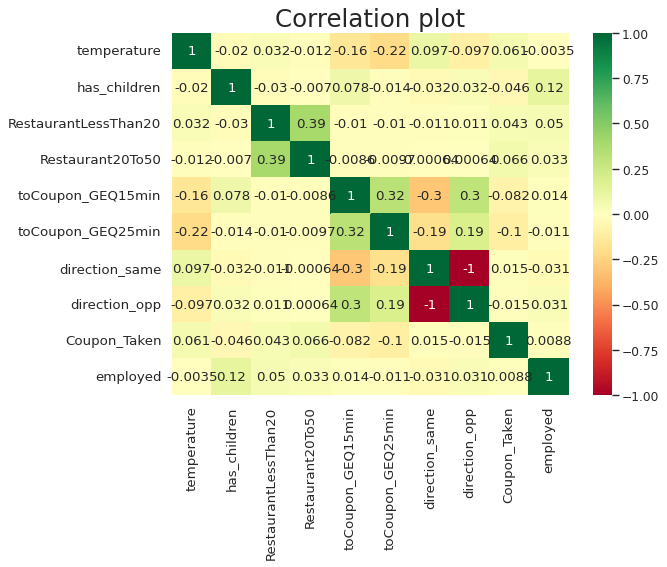

In [ ]:
plt.figure(figsize=(8,6), dpi= 80)
sns.heatmap(eda_data.corr(), xticklabels=eda_data.corr().columns, yticklabels=eda_data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlation plot', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'number of people accepting coupon at a given time')

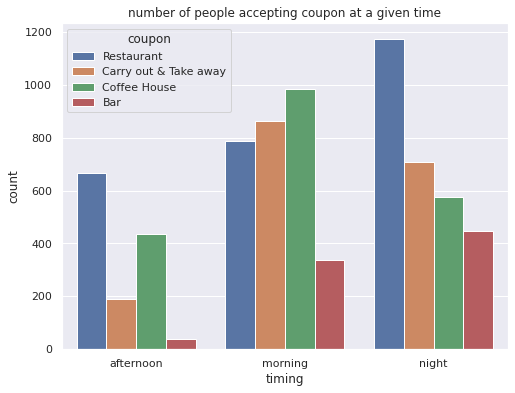

In [ ]:
sns.countplot(positive_data['timing'],hue=positive_data['coupon'])
plt.title('number of people accepting coupon at a given time')

**Most coupons are accepted at night time, and those are of restaurant**

# Data transform

Various data transformation techniques are used to transform the data in categorical format to numerical format which can be further used by machine learning models for the analysis. 

Detailed explaination can be found in the report. 





In [ ]:


class transform:
# Convert nominal features into one hot vectors.
    @classmethod
    def convert_onehot(cls, indf, collist):
        dummy = pd.get_dummies(indf[collist])
        tmp = indf.copy()
        tmp = pd.concat([tmp, dummy],axis=1,join='inner')
        tmp.drop(columns=collist,axis=1,inplace=True)
        return tmp

    @classmethod
    def col_map_values(cls, indf, colname, mapvec):
        indf[colname] = indf[colname].map(mapvec,na_action="ignore")
        return


    @classmethod
    def nominal_features(cls, indf):
        outdf = indf.copy()
        nominal_cols = ['destination','passanger','weather','coupon','maritalStatus']
        binary_cols = ['gender', "expiration"]
        outdf = transform.convert_onehot(outdf, nominal_cols)
        g_map = {"Male":1, "Female":0}
        exp_map = {"1d":1, "2h":0}
        transform.col_map_values(outdf, binary_cols[0], g_map)
        transform.col_map_values(outdf, binary_cols[1], exp_map)
        return outdf

    @classmethod
    def ordinal_features(cls, indf):
        outdf = indf.copy()
        ordinal_features = ['CarryAway', 'CoffeeHouse', 'Bar','Restaurant20To50', 'RestaurantLessThan20']
        # age, income
        mapvec = {'never': 0,'less1': 0,'1 to 3': 1,'4 to 8': 2,'greater than 8': 3}
        for col in ordinal_features:
            transform.col_map_values(outdf, col, mapvec)
        age_map = {'below21': 4,'21': 1,'26': 2,'31': 3,'36': 3,'41': 2,'46': 1,'50plus': 0}
        temp_map = {30:1, 55:2, 80:3}
        income_map = {'Less than $12500': 0,'$12500 - $24999': 1,'$25000 - $37499': 2,
                      '$37500 - $49999': 3,'$50000 - $62499': 4,'$62500 - $74999': 5,
                      '$75000 - $87499': 6,'$87500 - $99999': 7,'$100000 or More': 8}
        # more priority is given to no-degree and BA
        education_map = {"Some college - no degree":5, "Bachelors degree":4, 
                         "Associates degree":4,"High School Graduate":3,
                         "Graduate degree (Masters or Doctorate)":2, "Some High School":1}
        time_map = {"7AM":0,"10AM":1,"2PM":2, "6PM":3,"10PM":4}
        
        transform.col_map_values(outdf, "age",age_map)
        transform.col_map_values(outdf, "income",income_map)
        transform.col_map_values(outdf, "temperature", temp_map)
        transform.col_map_values(outdf, "education", education_map)
        transform.col_map_values(outdf, "time", time_map)
        return outdf


    @classmethod
    def transform_occupation(cls, indf):
    # As there are 25 unique values for "occupation" feature, we can not do one-hot vector encoding. So, we are going to use frequency encoding
    # as it is correlated with the target value.
        outdf = indf.copy()
        col_name = "occupation"
        fq_map = outdf.groupby(col_name).size()/len(outdf) 
        transform.col_map_values(outdf, col_name, fq_map)
        return outdf





In [ ]:
data = transform.nominal_features(data)


In [ ]:
data = transform.ordinal_features(data)

In [ ]:
data = transform.transform_occupation(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature                      12684 non-null  int64  
 1   time                             12684 non-null  int64  
 2   expiration                       12684 non-null  int64  
 3   gender                           12684 non-null  int64  
 4   age                              12684 non-null  int64  
 5   has_children                     12684 non-null  int64  
 6   education                        12684 non-null  int64  
 7   occupation                       12684 non-null  float64
 8   income                           12684 non-null  int64  
 9   car                              108 non-null    object 
 10  Bar                              8679 non-null   float64
 11  CoffeeHouse                      6347 non-null   float64
 12  CarryAway         

In [ ]:
# sns.set(rc={'figure.figsize':(16,6)})
# sns.lineplot(list(positive_data['income_map'].value_counts().sort_index().to_dict()),
#              list(positive_data['income_map'].value_counts().sort_index().to_dict().values()))
# plt.show()

# Data cleaning

In this we impute missing values using following methods: 

1. Knn imputation
2. multiple imputation

what is done in this section 

* remove "car" attribute
* fill missing values



In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
class Clean:
    @classmethod
    def drop_extra_features(cls, indf):
        outdf = indf.copy()
        # As "car" feature has mostly null values. we are going to drop that feature.
        outdf.drop(columns=["car"], inplace=True)

        # "toCoupon_GEQ5min" feature has only one unique value. This feature can't be used for any predition. 
        outdf.drop(columns=["toCoupon_GEQ5min"], inplace=True)

        # "direction_opp" and "direction_same" is highly correlated. So, we can remove one attribute.
        outdf.drop(columns=["direction_opp"], inplace=True)

        return outdf
    
    @classmethod
    def knn_impute(cls, indf):
        outdf = indf.copy()
        # missing values are imputed using KNN classifier.
        missing_cols = ["CoffeeHouse", "Bar","CarryAway","RestaurantLessThan20","Restaurant20To50"]
        imputer = KNNImputer(n_neighbors=1)
        numpy_vec = imputer.fit_transform(outdf[missing_cols])
        df = pd.DataFrame(numpy_vec, columns=missing_cols)
        outdf.drop(columns=missing_cols, inplace=True)
        outdf = pd.concat([outdf, df],axis=1,join='inner')
        return outdf
    





In [ ]:
data = Clean.drop_extra_features(data)

In [ ]:
data = Clean.knn_impute(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature                      12684 non-null  int64  
 1   time                             12684 non-null  int64  
 2   expiration                       12684 non-null  int64  
 3   gender                           12684 non-null  int64  
 4   age                              12684 non-null  int64  
 5   has_children                     12684 non-null  int64  
 6   education                        12684 non-null  int64  
 7   occupation                       12684 non-null  float64
 8   income                           12684 non-null  int64  
 9   toCoupon_GEQ15min                12684 non-null  int64  
 10  toCoupon_GEQ25min                12684 non-null  int64  
 11  direction_same                   12684 non-null  int64  
 12  Y                 

# Data Reduction

Feature selection and feature engineering is done in this phase. 

Use PCA, k best features algorithms to reduce the dimensionality. 

As the correlation between all the features is very small. We can not directly remove any feature. we should use dimensionality reduction techniques. 

In [ ]:
data.head()

,temperature,time,expiration,gender,age,has_children,education,occupation,income,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,CoffeeHouse,Bar,CarryAway,RestaurantLessThan20,Restaurant20To50
0,2,2,1,0,1,1,5,0.14743,3,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
1,3,1,0,0,1,1,5,0.14743,3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
2,3,1,0,0,1,1,5,0.14743,3,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
3,3,2,0,0,1,1,5,0.14743,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
4,3,2,1,0,1,1,5,0.14743,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target_df = pd.DataFrame(data["Y"])
data.drop(columns=['Y'], inplace=True)

In [ ]:
target_df.rename(columns={"1":"y"}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature                      12684 non-null  int64  
 1   time                             12684 non-null  int64  
 2   expiration                       12684 non-null  int64  
 3   gender                           12684 non-null  int64  
 4   age                              12684 non-null  int64  
 5   has_children                     12684 non-null  int64  
 6   education                        12684 non-null  int64  
 7   occupation                       12684 non-null  float64
 8   income                           12684 non-null  int64  
 9   toCoupon_GEQ15min                12684 non-null  int64  
 10  toCoupon_GEQ25min                12684 non-null  int64  
 11  direction_same                   12684 non-null  int64  
 12  destination_Home  

In [ ]:
from sklearn.decomposition import PCA
from yellowbrick.features import PCA
# import sklearn

In [ ]:
# https://stats.stackexchange.com/questions/55718/pca-and-the-train-test-split
# pca and train test split.

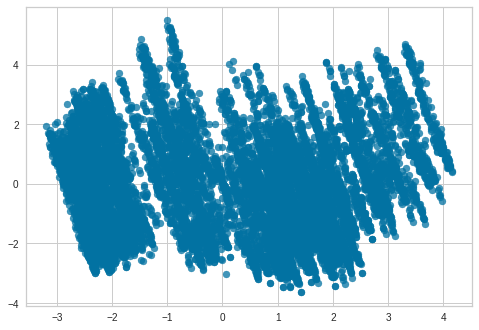

In [ ]:
tmpdf = data.copy()
pca = PCA(n_components=0.99)
pca.fit(tmpdf)
x_pca_46 = pca.transform(tmpdf)
# pca.explained_variance_ratio_

In [ ]:
x_pca_46.shape

(12684, 2)

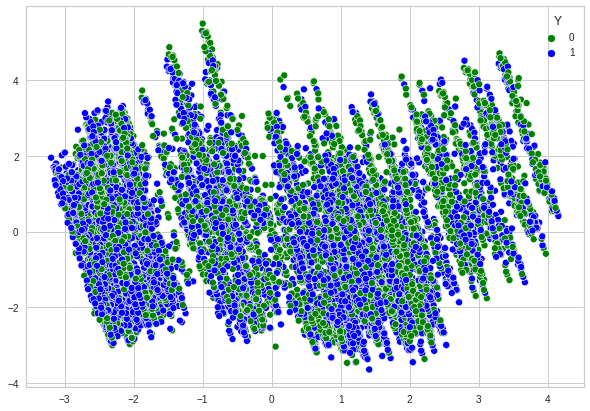

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x_pca_46[:,0], y=x_pca_46[:,1], hue=target_df.Y, palette=['green','blue'])


In [ ]:
pcadf = pd.DataFrame(x_pca_46)

In [ ]:
pcadf

,0,1
0,-0.486837,-0.750229
1,-2.414893,-1.455843
2,-2.110539,-0.703998
3,-2.551071,-1.086906
4,-2.380895,-1.002078
...,...,...
12679,1.399019,-0.768286
12680,2.899942,-0.324913
12681,3.493732,-0.403369
12682,3.978351,1.339859


In [ ]:
! pip install prince
import prince

In [ ]:
tmpdf = data.copy()

In [ ]:
tmpdf = tmpdf[tmpdf.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 


In [ ]:
tmpdf

,temperature,time,expiration,gender,age,has_children,education,occupation,income,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,CoffeeHouse,Bar,CarryAway,RestaurantLessThan20,Restaurant20To50
0,2,2,1,0,1,1,5,0.147430,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
1,3,1,0,0,1,1,5,0.147430,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
2,3,1,0,0,1,1,5,0.147430,3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
3,3,2,0,0,1,1,5,0.147430,3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
4,3,2,1,0,1,1,5,0.147430,3,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,2,3,1,1,2,0,4,0.086172,6,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
12680,2,0,1,1,2,0,4,0.086172,6,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
12681,1,0,1,1,2,0,4,0.086172,6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
12682,1,0,1,1,2,0,4,0.086172,6,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# famd = FAMD(n_components = 0.95)
# famd.fit(tmpdf)
# famd.transform(tmpdf)
pca = prince.PCA(n_components=37,copy=False,check_input=True,engine='auto',random_state=42)
pca = pca.fit(tmpdf)

In [ ]:
pca_data = pca.transform(tmpdf)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
sum(pca.explained_inertia_)

0.9999999999999999

In [ ]:
pca.explained_inertia_*100

array([1.16065442e+01, 8.69028452e+00, 7.90483804e+00, 6.86564515e+00,
       5.06348464e+00, 4.74856544e+00, 4.40064426e+00, 4.33357657e+00,
       4.21557058e+00, 4.01051902e+00, 3.74773139e+00, 3.58490172e+00,
       3.43393502e+00, 3.22473450e+00, 2.90582789e+00, 2.88636315e+00,
       2.70950137e+00, 2.56289329e+00, 2.43711827e+00, 2.03086023e+00,
       1.81623289e+00, 1.68371290e+00, 1.44962406e+00, 1.30297431e+00,
       1.21794864e+00, 6.83464962e-01, 4.82503022e-01, 2.28898723e-30,
       7.02306421e-32, 7.02306421e-32, 7.02306421e-32, 7.02306421e-32,
       7.02306421e-32, 7.02306421e-32, 7.02306421e-32, 7.02306421e-32,
       7.02306421e-32])

In [ ]:
sum(pca.explained_inertia_[:20])

0.9136353921308825

In [ ]:
sum(pca.explained_inertia_[:25])

0.9883403201594441

In [ ]:
pca_data = pca_data.loc[:, :24]
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.487383,-0.758497,0.086509,0.370166,1.514430,1.118045,-0.289382,-2.078100,-1.437163,0.616867,-1.600371,1.241151,-0.214846,0.406685,0.021102,-0.258028,-1.288106,0.426038,-1.263456,0.210333,-1.130031,0.366431,-0.878311,0.994550,-0.782989
1,-2.415068,-1.458036,0.309539,-0.881701,1.313038,1.032962,-0.933541,1.037632,-0.318323,1.523493,-1.725182,0.856582,0.110984,0.420217,-0.166467,0.045968,-1.558116,0.514933,0.341228,0.082334,-1.178236,0.263349,0.946067,0.510522,-0.949060
2,-2.110588,-0.704797,0.993526,-0.735990,0.687433,1.011413,0.189727,-0.552134,1.232641,3.115825,-1.612159,-0.735509,-0.614928,0.759830,-0.168194,0.102647,-1.177516,0.513562,0.475527,0.173721,-0.788206,0.356429,-0.073674,0.015505,-1.332629
3,-2.551223,-1.088426,0.661793,-0.695803,1.069749,0.931041,-0.164100,1.528730,-0.329880,1.814971,-2.027387,0.136470,-0.254646,0.627588,-0.043906,-0.042619,-1.569056,0.538667,0.425068,0.153553,-0.016452,0.609133,0.127451,0.442629,-1.100068
4,-2.381027,-1.004081,0.770570,-0.577047,1.102582,0.978639,0.392177,1.141163,-0.291867,1.941448,-1.362874,1.151087,-0.337781,0.449911,-0.073645,-0.146825,-1.713401,0.628823,-0.756865,0.079798,0.658652,0.860759,0.318405,0.472452,-1.104157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1.399496,-0.760303,0.736119,3.368311,1.241375,-0.318137,-1.546253,-0.583438,3.487519,-0.473780,1.094201,-1.240758,1.058770,-1.039403,-0.455116,0.796005,2.032233,0.021690,-1.105961,0.453756,0.964923,0.947914,1.534317,0.579533,-0.684800
12680,2.900245,-0.319518,2.078272,-0.668959,0.009075,-0.796902,-1.132392,-0.970853,2.908627,-0.432203,0.454146,-0.397532,1.528740,-0.965121,0.266529,-0.101712,-0.018406,0.045804,-1.780970,0.602440,-0.839216,0.042394,0.117501,0.315186,0.052867
12681,3.493853,-0.402934,1.756502,-0.184475,-0.599251,-1.237812,-2.624095,0.433940,-0.821810,0.270942,1.098205,2.255556,0.985520,-0.732798,0.671205,-0.256283,0.477497,-0.118099,0.857644,0.734586,0.796763,0.520308,0.847656,0.064212,-0.191353
12682,3.978369,1.339374,3.858710,-0.246043,-0.028635,-1.201262,1.075032,0.310456,-0.979550,-0.760096,0.985996,1.023541,-1.123682,0.149476,0.564040,-0.004493,0.373793,0.007718,1.061024,0.735951,-0.328310,0.097800,0.828968,-0.528016,-0.422634


In [ ]:
# pca_data 

## RFE

to select best 20 features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.feature_selection import RFE

# svm = SVC(kernel='rbf')
# _ = svm.fit(rfe.transform(X_train_std), y_train)
# svm.score(rfe.transform(X_test_std), y_test)

regressor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
n_features_to_select = 20
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(data, target_df.values.ravel())


RFE(estimator=RandomForestClassifier(criterion='entropy'),
    n_features_to_select=20)

In [ ]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  5,  1, 10,  1,  3,
       11,  8,  9, 12,  1,  1,  1,  1,  6,  1,  7,  1,  1,  1, 13, 14, 15,
       16, 17, 18])

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False])

In [ ]:
data.columns

Index(['temperature', 'time', 'expiration', 'gender', 'age', 'has_children',
       'education', 'occupation', 'income', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passanger_Alone',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'maritalStatus_Divorced', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'CoffeeHouse', 'Bar', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [ ]:
print (data.columns[rfe.support_])
print (len(data.columns[rfe.support_]))

Index(['temperature', 'time', 'expiration', 'gender', 'age', 'has_children',
       'education', 'occupation', 'income', 'toCoupon_GEQ15min',
       'destination_No Urgent Place', 'passanger_Alone', 'weather_Sunny',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(<20)', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner'],
      dtype='object')
20


In [ ]:
columns = ['temperature', 'time', 'expiration', 'gender', 'age', 'has_children',
       'education', 'occupation', 'income', 'toCoupon_GEQ15min',
       'destination_No Urgent Place', 'passanger_Friend(s)', 'weather_Sunny',
       'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(<20)', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner']
rfe_data = data.loc[:,columns]

In [ ]:
rfe_data

,temperature,time,expiration,gender,age,has_children,education,occupation,income,toCoupon_GEQ15min,destination_No Urgent Place,passanger_Friend(s),weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(<20),maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner
0,2,2,1,0,1,1,5,0.147430,3,0,1,0,1,0,0,0,1,0,0,1
1,3,1,0,0,1,1,5,0.147430,3,0,1,1,1,0,0,1,0,0,0,1
2,3,1,0,0,1,1,5,0.147430,3,1,1,1,1,0,1,0,0,0,0,1
3,3,2,0,0,1,1,5,0.147430,3,1,1,1,1,0,0,1,0,0,0,1
4,3,2,1,0,1,1,5,0.147430,3,1,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,2,3,1,1,2,0,4,0.086172,6,0,0,0,0,0,1,0,0,0,1,0
12680,2,0,1,1,2,0,4,0.086172,6,0,0,0,0,0,1,0,0,0,1,0
12681,1,0,1,1,2,0,4,0.086172,6,0,0,0,0,0,0,1,0,0,1,0
12682,1,0,1,1,2,0,4,0.086172,6,1,0,0,0,1,0,0,0,0,1,0


# Data Modeling

Several models are used with cross validation. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# now we have data in 3 different feature spaces.
# 1. data
# 2. pca_data
# 3. rfe_data

In [ ]:
# train test split

# x_train, x_test, y_train, y_test = train_test_split(data, target_df, random_state=42, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(rfe_data, target_df, test_size=0.2)

## KNN

In [ ]:
# predicting with KNN model
# Grid search cross validation technique is used in the following models.

knn = KNeighborsClassifier()
params = {"n_neighbors": [3,7,11,15,17]}
search = GridSearchCV(estimator=knn,
                      param_grid=params,
                      cv=5,
                      return_train_score=True,
                      n_jobs=-1)
search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 7, 11, 15, 17]},
             return_train_score=True)

In [ ]:
print ("Best score is: ",search.best_score_)
print ("Best params: ",search.best_params_)
print ("Best estimator: ", search.best_estimator_)

Best score is:  0.6645310000072835
Best params:  {'n_neighbors': 11}
Best estimator:  KNeighborsClassifier(n_neighbors=11)


In [ ]:
# predicting the test data using the best hyper-parameters obtained from GridSearch
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean', p = 2)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc_knn_train = knn.score(x_train, y_train)
acc_knn_test = knn.score(x_test, y_test)
print ("Confusion Matrix using K nearest neighbors:")
print (cm)
print ("Train accuracy: ", acc_knn_train)
print ("Test accuracy: ", acc_knn_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix using K nearest neighbors:
[[ 586  491]
 [ 336 1124]]
Train accuracy:  0.7315462698334483
Test accuracy:  0.6740244383129681


## Decision tree

In [ ]:
# Decision tree classifier 

param_grid = { 'criterion':['gini','entropy'],'max_depth': [5,10,20]}
dtree_model=DecisionTreeClassifier()
search = GridSearchCV(dtree_model, param_grid=param_grid, cv=5)
search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20]})

In [ ]:
param_grid

{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}

In [ ]:
print ("Best score is: ",search.best_score_)
print ("Best params: ",search.best_params_)
print ("Best estimator: ", search.best_estimator_)

Best score is:  0.6567445925702924
Best params:  {'criterion': 'entropy', 'max_depth': 5}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [ ]:
lr_cv = pd.DataFrame(search.cv_results_)
print ("Decision tree with RFE features")
 [['params','mean_test_score','rank_test_score']]

Decision tree with RFE features


,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 5}",0.656350,2
1,"{'criterion': 'gini', 'max_depth': 10}",0.639597,4
2,"{'criterion': 'gini', 'max_depth': 20}",0.631123,6
3,"{'criterion': 'entropy', 'max_depth': 5}",0.656745,1
4,"{'criterion': 'entropy', 'max_depth': 10}",0.642752,3
5,"{'criterion': 'entropy', 'max_depth': 20}",0.633486,5


In [ ]:
# predicting the test data using the best hyper-parameters obtained from GridSearch
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc_dt_model_train_rfe = dt_model.score(x_train, y_train)
acc_dt_model_test_rfe = dt_model.score(x_test, y_test)
print ("Confusion Matrix using decision tree:")
print (cm)
print ("Train accuracy: ", acc_dt_model_train_pca)
print ("Test accuracy: ", acc_dt_model_test_pca)

Confusion Matrix using decision tree:
[[ 574  503]
 [ 349 1111]]


NameError: ignored

In [ ]:
print ("Train accuracy dt 37: ", acc_dt_model_train_37)
print ("Test accuracy dt 37: ", acc_dt_model_test_37)
print ("Train accuracy dt pca: ", acc_dt_model_train_pca)
print ("Test accuracy dt pca: ", acc_dt_model_test_pca)
print ("Train accuracy dt rfe: ", acc_dt_model_train_rfe)
print ("Test accuracy dt rfe: ", acc_dt_model_test_rfe)

## Logistic regression

In [ ]:
grid_values = {'C': [0.02,0.08,0.1,2]}
log_reg = LogisticRegression(max_iter=100000)
search = GridSearchCV(log_reg, param_grid=grid_values, cv=5)
search.fit(x_train, y_train.values.ravel())

In [ ]:
print ("Best score is: ",search.best_score_)
print ("Best params: ",search.best_params_)
print ("Best estimator: ", search.best_estimator_)
# print ("grid search cv result for all combinations: ", search.cv_results_)

In [ ]:
lr_cv = pd.DataFrame(search.cv_results_)
print ("logistic regression with RFE")
lr_cv[['params','mean_test_score','rank_test_score']]

In [ ]:
lr_model = LogisticRegression(C=0.1, max_iter=100000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc_lr_model_train_rfe = lr_model.score(x_train, y_train)
acc_lr_model_test_rfe = lr_model.score(x_test, y_test)
print ("Confusion Matrix using logistic regression:")
print (cm)
print ("Train accuracy: ", acc_lr_model_train_rfe)
print ("Test accuracy: ", acc_lr_model_test_rfe)

In [ ]:
print ("Train accuracy 37: ", acc_lr_model_train_37)
print ("Test accuracy 37: ", acc_lr_model_test_37)
print ("Train accuracy pca: ", acc_lr_model_train_pca)
print ("Test accuracy pca: ", acc_lr_model_test_pca)
print ("Train accuracy rfe: ", acc_lr_model_train_rfe)
print ("Test accuracy rfe: ", acc_lr_model_test_rfe)

## random forest classifier

In [ ]:
grid_values = {
#  'max_depth': [10, 20, 30, 40, 50, 60, 70],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100,150,200]}
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rforest_clf = RandomForestClassifier()
search = GridSearchCV(rforest_clf, param_grid=grid_values, cv=5)
search.fit(x_train, y_train.values.ravel())

In [ ]:
grid_values

In [ ]:
print ("Best score is: ",search.best_score_)
print ("Best params: ",search.best_params_)
print ("Best estimator: ", search.best_estimator_)

In [ ]:
lr_cv = pd.DataFrame(search.cv_results_)
print ("Random forest classifier with PCA features")
lr_cv[['params','mean_test_score','rank_test_score']]

In [ ]:
rand_forest = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rand_forest.fit(x_train, y_train)
y_pred = rand_forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc_rand_forest_train_pca = rand_forest.score(x_train, y_train)
acc_rand_forest_test_pca = rand_forest.score(x_test, y_test)
print ("Confusion Matrix using logistic regression:")
print (cm)
print ("Train accuracy: ", acc_rand_forest_train_pca)
print ("Test accuracy: ", acc_rand_forest_test_pca)

In [ ]:
print ("Train accuracy Random forest with 37: ", acc_rand_forest_train_37)
print ("Test accuracy Random forest with 37: ", acc_rand_forest_test_37)
print ("Train accuracy Random forest with pca: ", acc_rand_forest_train_pca)
print ("Test accuracy Random forest with pca: ", acc_rand_forest_test_pca)


## SVM

In [ ]:
Cs = [ 0.1, 1, 4]
gammas = [ 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(x_train, y_train.values.ravel())

In [ ]:
param_grid

In [ ]:
print ("Best score is: ",grid_search.best_score_)
print ("Best params: ",grid_search.best_params_)
print ("Best estimator: ", grid_search.best_estimator_)

In [ ]:
svm_cv = pd.DataFrame(grid_search.cv_results_)
print ("SVM with RFE")
svm_cv[['params','mean_test_score','rank_test_score']]

In [ ]:
svm_model = SVC(kernel='rbf', C=4, gamma=0.1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc_svm_train_rfe = svm_model.score(x_train, y_train)
acc_svm_test_rfe = svm_model.score(x_test, y_test)
print ("Confusion Matrix using logistic regression:")
print (cm)
print ("Train accuracy: ", acc_svm_train_rfe)
print ("Test accuracy: ", acc_svm_test_rfe)

In [ ]:
print ("Train accuracy svm 37: ", acc_svm_train_37)
print ("Test accuracy svm 37: ", acc_svm_test_37)
print ("Train accuracy svm pca: ", acc_svm_train_pca)
print ("Test accuracy svm pca: ", acc_svm_test_pca)
print ("Train accuracy svm rfe: ", acc_svm_train_rfe)
print ("Test accuracy svm rfe: ", acc_svm_test_rfe)

In [ ]:
# plot results
# compare 

# for 37 features
# train


models = ['logistic', "SVM", "Decision tree"]
acc_train = [e*100 for e in [acc_lr_model_train_rfe,acc_svm_train_rfe,acc_dt_model_train_rfe]]
acc_test = [e*100 for e in [acc_lr_model_test_rfe,acc_svm_test_rfe,acc_dt_model_test_rfe]]


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
train = ax.bar(index, acc_train, bar_width,
                label="train")

test = ax.bar(index+bar_width, acc_test,
                 bar_width, label="test")

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy result comparision when RFE features used')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Logistic regression", "SVM", "Decision trees"])
ax.legend()

plt.show()